/tmp/ipython-input-2177889890.py:20: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 54.3k/54.3k [00:00<00:00, 39.2MB/s]

Multiple Linear Regression → MSE: 33596915.851, RMSE: 5796.285, R2: 0.784
Ridge Regression → MSE: 33604973.540, RMSE: 5796.980, R2: 0.784
Lasso Regression → MSE: 33596958.010, RMSE: 5796.288, R2: 0.784


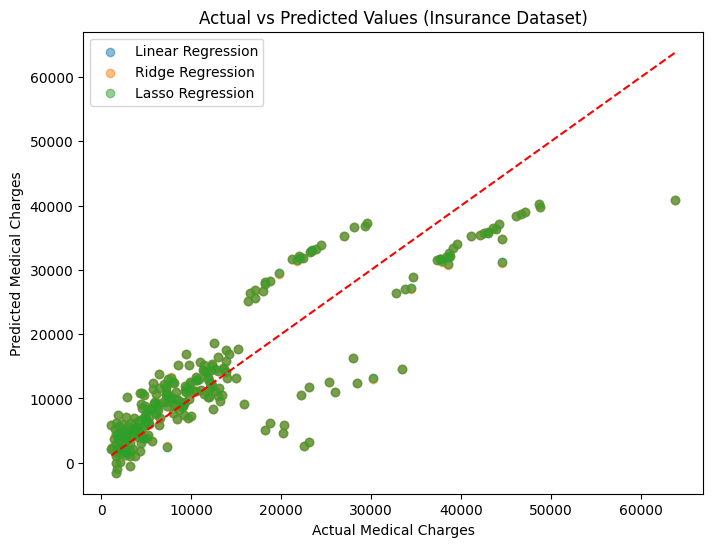

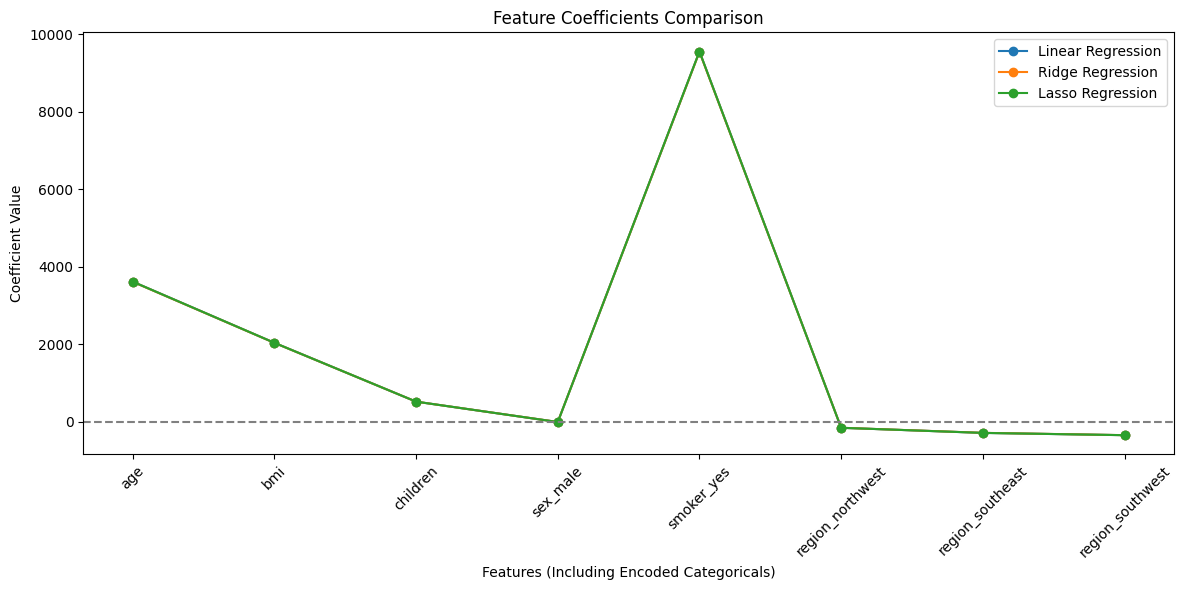

In [1]:
# =========================================
# MULTIPLE, RIDGE & LASSO REGRESSION
# MEDICAL COST PERSONAL DATASET
# =========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
from kagglehub import KaggleDatasetAdapter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# -------------------------
# Load Dataset
# -------------------------
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "mirichoi0218/insurance",
    "insurance.csv"
)

# Preprocessing: Convert categorical variables to dummy/indicator variables
# This is required for medical dataset features like 'smoker' and 'region'
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]
feature_names = X.columns

# -------------------------
# Train-Test Split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------
# Feature Scaling
# -------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------
# Model Training
# -------------------------
lr = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.01)

lr.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

# -------------------------
# Predictions
# -------------------------
lr_pred = lr.predict(X_test_scaled)
ridge_pred = ridge.predict(X_test_scaled)
lasso_pred = lasso.predict(X_test_scaled)

# -------------------------
# Evaluation
# -------------------------
def print_metrics(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} → MSE: {mse:.3f}, RMSE: {rmse:.3f}, R2: {r2:.3f}")

print_metrics("Multiple Linear Regression", y_test, lr_pred)
print_metrics("Ridge Regression", y_test, ridge_pred)
print_metrics("Lasso Regression", y_test, lasso_pred)

# -------------------------
# PLOT 1: ACTUAL vs PREDICTED
# -------------------------
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_pred, alpha=0.5, label="Linear Regression")
plt.scatter(y_test, ridge_pred, alpha=0.5, label="Ridge Regression")
plt.scatter(y_test, lasso_pred, alpha=0.5, label="Lasso Regression")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--", color='red')
plt.xlabel("Actual Medical Charges")
plt.ylabel("Predicted Medical Charges")
plt.title("Actual vs Predicted Values (Insurance Dataset)")
plt.legend()
plt.show()

# -------------------------
# PLOT 2: FEATURE vs COEFFICIENT VALUES
# -------------------------
plt.figure(figsize=(12, 6))
plt.plot(feature_names, lr.coef_, label="Linear Regression", marker="o")
plt.plot(feature_names, ridge.coef_, label="Ridge Regression", marker="o")
plt.plot(feature_names, lasso.coef_, label="Lasso Regression", marker="o")
plt.axhline(0, linestyle="--", color='gray')
plt.xlabel("Features (Including Encoded Categoricals)")
plt.ylabel("Coefficient Value")
plt.title("Feature Coefficients Comparison")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()